In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)
>>
Temperature   Revenue
24.566884     534.799028
26.005191     625.190122
27.790554     660.632289
20.595335     487.706960
11.503498     316.240194sf

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

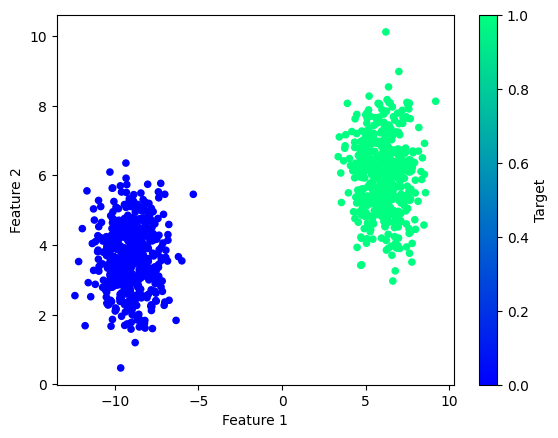

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

Metal device set to: Apple M1


2022-10-27 15:57:24.982603: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 15:57:24.982821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


2022-10-27 16:24:12.603029: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 16:24:12.808299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 7ms/step - loss: 1.2278 - accuracy: 0.0120
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1751 - accuracy: 0.0253
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1279 - accuracy: 0.0267
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0841 - accuracy: 0.0427
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0447 - accuracy: 0.0600
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0097 - accuracy: 0.0760
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9790 - accuracy: 0.1000
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9512 - accuracy: 0.1240
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9268 - accuracy: 0.1400
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9051 - accuracy: 0.1653
Epoch 11/100
24/24 [=

<AxesSubplot: >

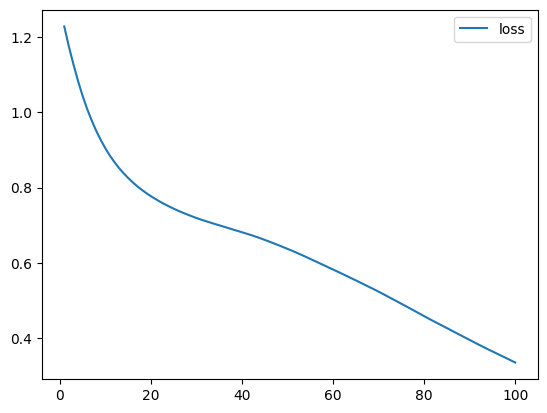

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot: >

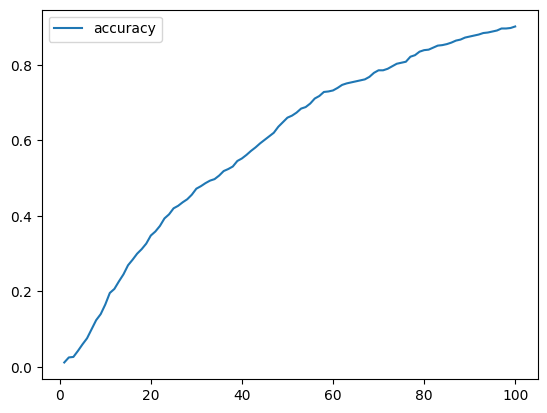

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3164 - accuracy: 0.9160 - 129ms/epoch - 16ms/step
Loss: 0.31636983156204224, Accuracy: 0.9160000681877136


2022-10-27 16:26:32.092968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
